## Lifestyle Sustainability Exploratory Data Analysis

In [2]:
#Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Import the dataset

df = pd.read_csv('lifestyle_sustainability_data.csv')
df.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


## Questions for this dataset
Question 1: Find the average monthly electricity and water consumption for each location

Question 2: Count of Physical activities based off of gender

Question 3: Frequency of plastic use and what disposal methods used for each location

Question 4a: Create age bracket for every row i.e. 18-26 Adolescence

Question 4b: DietType based off of age bracket and gender

### NOTE
Before we answer the questions above, let's analyze what is the content of the given dataset.

Remove unnecessary columns if it is a must and clean the data if necessary.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ParticipantID                  499 non-null    int64 
 1   Age                            499 non-null    int64 
 2   Location                       499 non-null    object
 3   DietType                       499 non-null    object
 4   LocalFoodFrequency             499 non-null    object
 5   TransportationMode             499 non-null    object
 6   EnergySource                   499 non-null    object
 7   HomeType                       499 non-null    object
 8   HomeSize                       499 non-null    int64 
 9   ClothingFrequency              499 non-null    object
 10  SustainableBrands              499 non-null    bool  
 11  EnvironmentalAwareness         499 non-null    int64 
 12  CommunityInvolvement           381 non-null    object
 13  Month

In [7]:
#Check for null values

df.isnull().sum()

ParticipantID                      0
Age                                0
Location                           0
DietType                           0
LocalFoodFrequency                 0
TransportationMode                 0
EnergySource                       0
HomeType                           0
HomeSize                           0
ClothingFrequency                  0
SustainableBrands                  0
EnvironmentalAwareness             0
CommunityInvolvement             118
MonthlyElectricityConsumption      0
MonthlyWaterConsumption            0
Gender                             0
UsingPlasticProducts               0
DisposalMethods                    0
PhysicalActivities               108
Rating                             0
dtype: int64

I will be dropping this __CommunityInvolvement__ column with null values and another few columns that I think I won't be needing in this EDA.

I will keep this __PhysicalActivities__ columns for now despite having numerous null values.

In [9]:
drop_col = ['CommunityInvolvement', 'SustainableBrands', 'ClothingFrequency', ]
df = df.drop(drop_col, axis=1)
df.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,EnvironmentalAwareness,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,5,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,4,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,2,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,4,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,3,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


This __PhysicalActivities__ Column is interesting so I will just fill the null values with something

In [11]:
df['PhysicalActivities'] = df['PhysicalActivities'].fillna('Prefer not to say')

In [12]:
df.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,EnvironmentalAwareness,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,5,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,4,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,2,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,4,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,3,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


#### Question 1: Find the average monthly electricity and water consumption for each location

In [14]:
df1 = df.groupby('Location')[['MonthlyElectricityConsumption','MonthlyWaterConsumption']].mean().round(2).rename(columns = {'MonthlyElectricityConsumption':'Avg_Electric_Consumption', 'MonthlyWaterConsumption':'Avg_Water_Consumption'}).sort_values('Avg_Electric_Consumption', ascending = False)
df1

,Avg_Electric_Consumption,Avg_Water_Consumption
Location,,
Rural,317.51,3419.24
Urban,288.32,3058.87
Suburban,271.35,2963.41


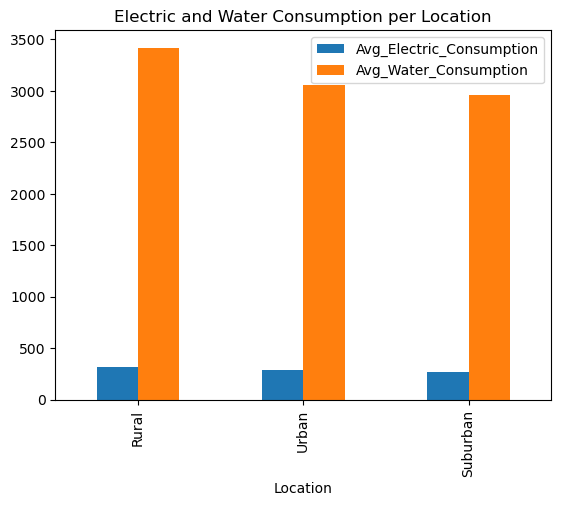

In [15]:
df1.plot(kind='bar')
plt.title('Electric and Water Consumption per Location')

plt.show()

#### Question 2: Count of Physical activities based off of gender

In [17]:
df2_1 = df.groupby(['Gender','PhysicalActivities']).size().to_frame('Count').reset_index()
df2_1

,Gender,PhysicalActivities,Count
0,Female,High,79
1,Female,Low,28
2,Female,Moderate,47
3,Female,Prefer not to say,13
4,Male,High,28
5,Male,Low,51
6,Male,Moderate,46
7,Male,Prefer not to say,51
8,Non-Binary,High,12
9,Non-Binary,Low,19


Now this is somewhat okay but it can be better by solving for the percentages of Physical Activities by gender.

Example: Females have a population of 167. Females with __High__ Physical Activities takes about 47ish percent of the population for females 

Gender Population / Number of x in Physical Activities by gender

In [19]:
df2 = df.groupby('Gender').PhysicalActivities.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
df2

Gender             PhysicalActivities
Female             High                  47.31%
                   Moderate              28.14%
                   Low                   16.77%
                   Prefer not to say      7.78%
Male               Low                   28.98%
                   Prefer not to say     28.98%
                   Moderate              26.14%
                   High                  15.91%
Non-Binary         Prefer not to say      32.1%
                   Moderate              29.63%
                   Low                   23.46%
                   High                  14.81%
Prefer not to say  Moderate              29.33%
                   High                   24.0%
                   Prefer not to say      24.0%
                   Low                   22.67%
Name: proportion, dtype: object

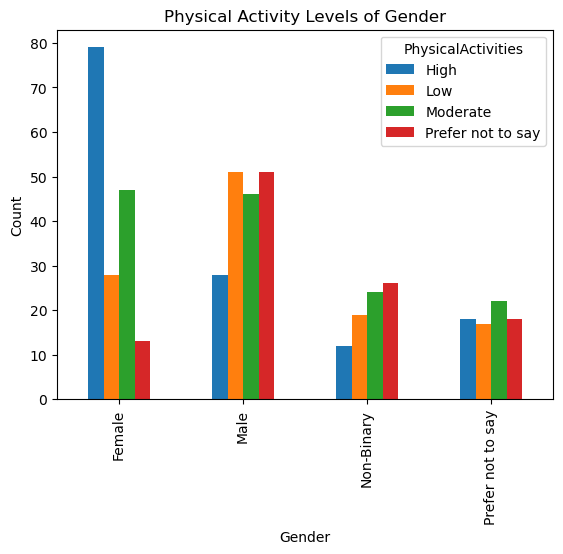

In [20]:
pivot_df2 = df2_1.pivot(index='Gender', columns='PhysicalActivities', values='Count')

pivot_df2.plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Physical Activity Levels of Gender')
plt.show()

#### Question 3: Frequency of plastic use and what disposal methods used for each location

In [22]:
df3a = df.groupby('Location').UsingPlasticProducts.value_counts().to_frame('UPP_Count').reset_index()

df3a

,Location,UsingPlasticProducts,UPP_Count
0,Rural,Rarely,63
1,Rural,Often,50
2,Rural,Sometimes,24
3,Rural,Never,16
4,Suburban,Sometimes,56
5,Suburban,Rarely,37
6,Suburban,Never,34
7,Suburban,Often,29
8,Urban,Often,65
9,Urban,Never,45


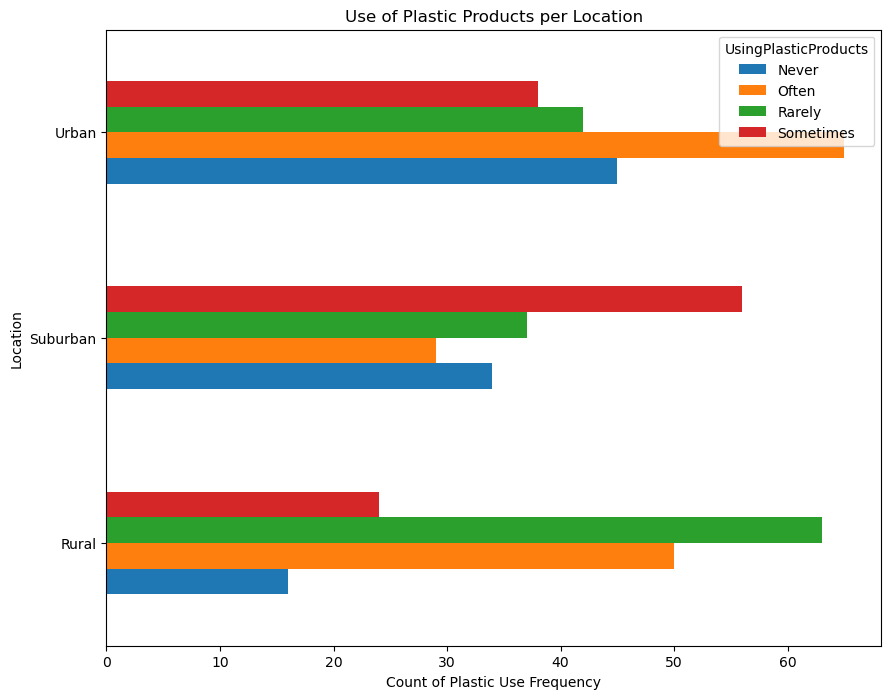

In [23]:
pivot_df3a = df3a.pivot(index='Location', columns=['UsingPlasticProducts'], values='UPP_Count')

pivot_df3a.plot(kind='barh', figsize=(10, 8))

plt.xlabel('Count of Plastic Use Frequency')
plt.ylabel('Location')
plt.title('Use of Plastic Products per Location')
plt.show()

In [24]:
df3b = df.groupby('Location').DisposalMethods.value_counts().to_frame('Disposal_Count').reset_index()
df3b

,Location,DisposalMethods,Disposal_Count
0,Rural,Combination,54
1,Rural,Landfill,53
2,Rural,Recycling,25
3,Rural,Composting,21
4,Suburban,Recycling,75
5,Suburban,Composting,43
6,Suburban,Landfill,25
7,Suburban,Combination,13
8,Urban,Landfill,63
9,Urban,Composting,60


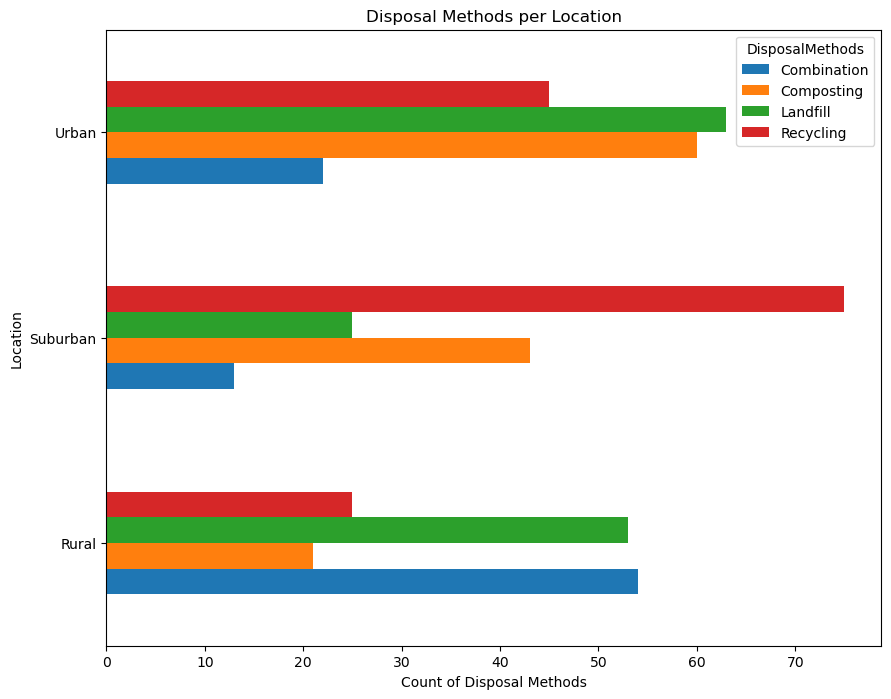

In [31]:
pivot_df3b = df3b.pivot(index='Location', columns=['DisposalMethods'], values='Disposal_Count')

pivot_df3b.plot(kind='barh', figsize=(10, 8))

plt.xlabel('Count of Disposal Methods')
plt.ylabel('Location')
plt.title('Disposal Methods per Location')
plt.show()

Notice how question 2 and 3 are quite similar yet I used a different method to count each Disposal Methods group by their Location.

The output will remain the same even if I used the method in question 2's answer.

#### Question 4a: Create age bracket for every row i.e. 18-26 Adolescence

#### Question 4b: DietType based off of age bracket and gender

I split question 4 into two because I want to create another column that contains an __age bracket category__ like this:

__Young Adult__: Individuals aged 20-39 years
__Middle-Aged Adult__: People aged 40-64 years

__Senior__: People aged 65 years and older

In [36]:
#Create an age bracket

df.loc[df['Age'].between(18,39), 'Age_Group'] = 'Young Adult'
df.loc[df['Age'].between(40,64), 'Age_Group'] = 'Middle-Aged Adult'
df.loc[df['Age']>=65, 'Age_Group'] = 'Senior'

In [38]:
df.head(10)

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,EnvironmentalAwareness,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating,Age_Group
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,5,100,1500,Female,Rarely,Composting,High,5,Young Adult
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,4,250,3000,Male,Sometimes,Recycling,Moderate,4,Young Adult
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,2,400,4500,Male,Often,Landfill,Low,1,Senior
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,4,150,2000,Female,Rarely,Recycling,High,5,Middle-Aged Adult
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,3,300,3500,Non-Binary,Sometimes,Combination,Moderate,3,Young Adult
5,6,58,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2200,1,450,5000,Male,Often,Landfill,Prefer not to say,1,Middle-Aged Adult
6,7,25,Urban,Mostly Plant-Based,Always,Bike,Renewable,Other,600,5,80,1200,Female,Never,Composting,High,5,Young Adult
7,8,39,Suburban,Balanced,Often,Public Transit,Renewable,House,1600,4,200,2800,Female,Sometimes,Recycling,Moderate,4,Young Adult
8,9,52,Rural,Mostly Plant-Based,Sometimes,Walk,Mixed,House,2000,3,350,4000,Male,Rarely,Combination,Low,3,Middle-Aged Adult
9,10,29,Urban,Mostly Animal-Based,Rarely,Car,Non-Renewable,Apartment,1100,2,380,4200,Non-Binary,Often,Landfill,Prefer not to say,1,Young Adult


In [40]:
df4 = df.groupby('Age_Group')['DietType'].value_counts().to_frame('DietCount').reset_index()
df4

,Age_Group,DietType,DietCount
0,Middle-Aged Adult,Mostly Plant-Based,120
1,Middle-Aged Adult,Balanced,63
2,Middle-Aged Adult,Mostly Animal-Based,62
3,Senior,Mostly Animal-Based,14
4,Senior,Mostly Plant-Based,14
5,Senior,Balanced,12
6,Young Adult,Balanced,83
7,Young Adult,Mostly Animal-Based,68
8,Young Adult,Mostly Plant-Based,63


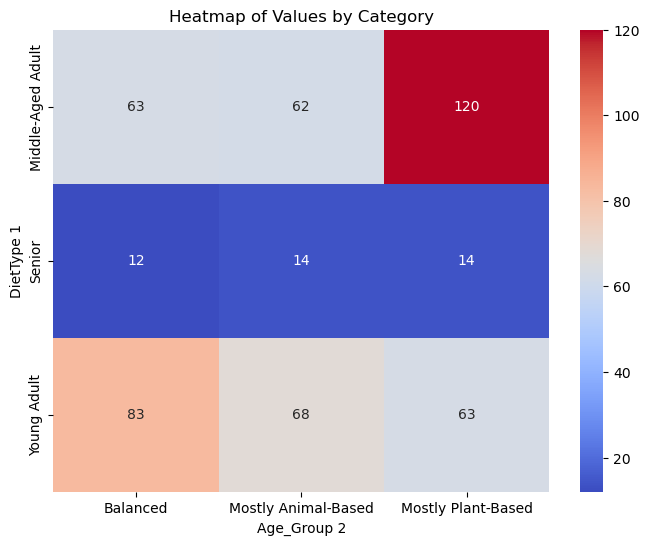

In [42]:
pivot_df4 = df4.pivot(index='Age_Group', columns=['DietType'], values='DietCount')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df4, annot=True, cmap='coolwarm', fmt='g')

plt.title('Heatmap of Values by Category')
plt.xlabel('Age_Group 2')
plt.ylabel('DietType 1')

plt.show()